In [1]:
import sys
sys.path.append('C:\\ML_Deployment')
import pandas as pd
import pandas_profiling

In [2]:
data =pd.read_csv("..\\data\\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
pandas_profiling.ProfileReport(data)

In [4]:
#step 1
#create a new column age_interval based on the actual age unmber
data['age_by_decade'] = pd.cut(x=data['age'], bins=[10, 19, 29, 39, 49, 59, 69], labels=['10s','20s', '30s', '40s', '50s','60s'])

In [5]:
#step 2 
#change the type of the variable children from numerical to categorical
data["children"]=data["children"].astype('category')
#data["smoker"]=data["smoker"].astype('category')

In [6]:
#step 3
# categorical data encoder using label encoder; 
from sklearn.preprocessing import LabelEncoder
#creating the instances of labelencoder
labelencoder_age = LabelEncoder().fit(data['age_by_decade'])
labelencoder_sex = LabelEncoder().fit(data['sex'])
labelencoder_region = LabelEncoder().fit(data['region'])
labelencoder_smoker = LabelEncoder().fit(data['smoker'])
labelencoder_children = LabelEncoder().fit(data['children'])

data['age_by_decade_Cat'] = labelencoder_age.transform(data['age_by_decade'])
data['sex_Cat'] = labelencoder_sex.transform(data['sex'])
data['region_Cat'] = labelencoder_region.transform(data['region'])
data['smoker_Cat'] = labelencoder_smoker.transform(data['smoker'])
data['children_Cat'] = labelencoder_children.transform(data['children'])


data

,age,sex,bmi,children,smoker,region,charges,age_by_decade,age_by_decade_Cat,sex_Cat,region_Cat,smoker_Cat,children_Cat
0,19,female,27.900,0,yes,southwest,16884.92400,10s,0,0,3,1,0
1,18,male,33.770,1,no,southeast,1725.55230,10s,0,1,2,0,1
2,28,male,33.000,3,no,southeast,4449.46200,20s,1,1,2,0,3
3,33,male,22.705,0,no,northwest,21984.47061,30s,2,1,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,30s,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50s,4,1,1,0,3
1334,18,female,31.920,0,no,northeast,2205.98080,10s,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,10s,0,0,2,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,20s,1,0,3,0,0


In [22]:
#labelencoder_age.transform('10s')
list(labelencoder_age.inverse_transform([0, 1, 2, 3, 4, 5]))

['10s', '20s', '30s', '40s', '50s', '60s']

In [14]:
list(labelencoder_sex.inverse_transform([0, 1]))

['female', 'male']

In [25]:
list(labelencoder_children.inverse_transform([0, 1,2, 3,4,5]))

[0, 1, 2, 3, 4, 5]

In [18]:
list(labelencoder_smoker.inverse_transform([0, 1]))

['no', 'yes']

In [20]:
list(labelencoder_region.inverse_transform([0, 1,2,3]))

['northeast', 'northwest', 'southeast', 'southwest']

In [36]:
#select data for machine learning
ml_data_x = data[['age_by_decade_Cat','sex_Cat','region_Cat','smoker_Cat','children_Cat','bmi']]
ml_data_y = data['charges']

In [37]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ml_data_x, ml_data_y, test_size=0.33, random_state=42)

In [38]:
#train a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)

0.7428704141097333
[ 2437.08374531   132.55833436  -283.58831266 23637.99682183
   365.04680772   341.35020524]
-8031.2065568023845


In [39]:
#Predict the test data
predictions = reg.predict(X_test)
predictions

array([ 8603.6297115 ,  6806.70578249, 36685.82094681,  9012.2161579 ,
       26351.65883802, 11133.72494275,  -629.29499846, 16942.0617211 ,
         307.82223712, 10017.49251234, 29186.83658306, 10301.01109458,
        4304.29994399, 38034.7448251 , 41325.64109907, 36505.69381751,
       14011.78842893, 35219.56970133,  8652.78811853, 31811.6534562 ,
        3671.17452874, 10419.9483818 ,  1627.63307891,  7993.32210813,
       12127.4483063 , 12872.45313171, 15284.83943572,  5594.47553833,
        9090.05375397,  1822.4703382 ,  9891.02798558, 12297.01039357,
        5741.58221994,  4464.44963887,  4293.22354984, 13000.0479331 ,
        2931.80447661,  9000.69768557, 33673.36419378, 32426.91349689,
        2705.8784137 ,  5321.22295223, 13451.7476418 , 10256.87467156,
        9341.70609566, 10751.09927266,  6331.98989354,  2945.06266104,
       35856.93051566, 10242.87063749, 15978.04799467,  1924.67748788,
       13500.22867527,  1019.12588948, 13035.19769992, 13540.53546451,
      

In [54]:
X_test

,age_by_decade_Cat,sex_Cat,region_Cat,smoker_Cat,children_Cat,bmi
764,3,0,0,0,2,25.175
887,2,0,1,0,0,30.020
890,5,0,1,1,0,26.885
1293,3,1,1,0,3,25.745
259,0,1,1,1,0,31.920
...,...,...,...,...,...,...
644,3,1,2,0,2,35.310
602,4,0,3,0,0,25.300
731,4,1,3,0,1,21.400
321,1,0,0,0,4,29.640


In [26]:
int_features = [3, 0, 0, 0, 2,25.175]

In [31]:
import numpy as np
arr=np.array([int_features])

In [32]:
arr.shape

(1, 6)

In [33]:
a=np.array([[3, 0, 0, 0, 2,25.175]])

In [41]:
a.shape

(1, 6)

In [40]:
#Predict a single record
import numpy as np
reg.predict(a)

array([8603.6297115])

In [58]:
#save the trained model 
import pickle
reg_model = "..//artifacts//reg_model.sav"

pickle.dump(reg, open(reg_model, 'wb'))

In [59]:
#load the trained model and make predictions
load_reg_model =pickle.load(open(reg_model, 'rb'))

In [60]:
#make batch predictions
load_reg_model.predict(X_test)

array([ 8603.6297115 ,  6806.70578249, 36685.82094681,  9012.2161579 ,
       26351.65883802, 11133.72494275,  -629.29499846, 16942.0617211 ,
         307.82223712, 10017.49251234, 29186.83658306, 10301.01109458,
        4304.29994399, 38034.7448251 , 41325.64109907, 36505.69381751,
       14011.78842893, 35219.56970133,  8652.78811853, 31811.6534562 ,
        3671.17452874, 10419.9483818 ,  1627.63307891,  7993.32210813,
       12127.4483063 , 12872.45313171, 15284.83943572,  5594.47553833,
        9090.05375397,  1822.4703382 ,  9891.02798558, 12297.01039357,
        5741.58221994,  4464.44963887,  4293.22354984, 13000.0479331 ,
        2931.80447661,  9000.69768557, 33673.36419378, 32426.91349689,
        2705.8784137 ,  5321.22295223, 13451.7476418 , 10256.87467156,
        9341.70609566, 10751.09927266,  6331.98989354,  2945.06266104,
       35856.93051566, 10242.87063749, 15978.04799467,  1924.67748788,
       13500.22867527,  1019.12588948, 13035.19769992, 13540.53546451,
      

In [61]:
#make single prediction
load_reg_model.predict(np.array([[3, 0, 0, 0, 2,25.175]]))

array([8603.6297115])

array([8603.6297115])

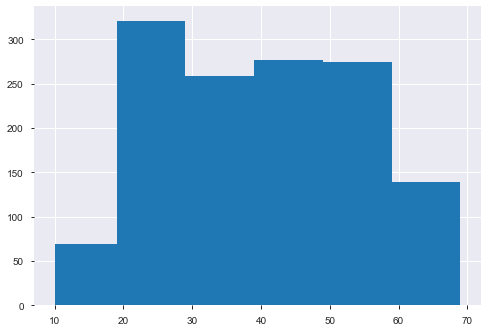

In [29]:
#Based on the profiling report, check the distribution of the age variable in details 

import seaborn as sns
import matplotlib.pyplot as plt
data['age'].hist(bins=[10, 19, 29, 39, 49, 59, 69], label= ['10s','20s', '30s', '40s', '50s','60s'])

In [19]:
data['age_by_decade'] = pd.cut(x=data['age'], bins=[10, 19, 29, 39, 49, 59, 69], labels=['10s','20s', '30s', '40s', '50s','60s'])

In [20]:
data.groupby(['age_by_decade'])['age_by_decade'].count()

age_by_decade
10s    137
20s    280
30s    257
40s    279
50s    271
60s    114
Name: age_by_decade, dtype: int64

In [26]:
data[(data.age <= 29) & (data.age > 19) ].count()

age              280
sex              280
bmi              280
children         280
smoker           280
region           280
charges          280
age_by_decade    280
dtype: int64